In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/Othercomputers/陈成的thinkpad/software-cup")

In [ ]:
!pip install -r requirements.txt

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import paddle
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [ ]:
os.chdir("/content/drive/Othercomputers/陈成的thinkpad/software-cup/task4")

In [ ]:
# !pip list --format=columns

In [ ]:
sns.__version__

In [ ]:
data = pd.read_csv("../dataset/Tianchi_power.csv", parse_dates=True)
# data = pd.read_csv("../dataset/RjbPowerRecord.csv", parse_dates=True)
data["record_date"] = pd.to_datetime(data["record_date"])
data.head()

In [ ]:
data.dtypes

In [ ]:
class DataAnalysis:
    def __init__(self, dataset, user_id):
        self.dataset = dataset
        self.user_id = user_id
    
    @property
    def user_id(self):
        return self.__user_id

    @user_id.setter
    def user_id(self, user_id):
        self.__user_id = user_id
        self.subdata = self.dataset[self.dataset["user_id"] == user_id]

    # 绘制企业整体用电情况图
    def plot_consumption(self):
        # figsize: 调整图片的宽高
        # dpi: 调整图片的清晰度
        fig, ax = plt.subplots(figsize=(16, 4), dpi=100)
        
        # color: 调整线条的颜色
        sns.lineplot(data=self.subdata, x="record_date", y="power_consumption", ax=ax, color="lightgreen")
        ax.set_title("user_id == %s" % self.user_id)
        plt.plot()
        
    # 限定范围日期 绘制企业用电情况
    def plot_consumption_by_date_range(self, date_min="2018-01-01", date_max="2020-01-01"):
        data = self.subdata
        data = data[(data["record_date"] >= date_min) & (data["record_date"] <= date_max)]
    
        fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
        sns.lineplot(data=data, x="record_date", y="power_consumption", ax=ax, color="red", marker='o')  # tianchi
        # sns.lineplot(data=data, x="record_date", y="payment_amount", ax=ax, color="blue", marker='o')  # cph
        ax.set_title("user_id == %s" % self.user_id)

        
        labels = ax.get_xticklabels()
        # rotation 调整x轴标签旋转角度
        plt.setp(labels, rotation=45, horizontalalignment='center')
        plt.plot()

    # 企业总用电量分析
    def plot_consumption_analysis(self):
        fig = plt.figure(figsize=(10, 4), dpi=100,constrained_layout=True)
        gs = GridSpec(1, 5, figure=fig)
        
        ax = fig.add_subplot(gs[0, :3])
        subdata = data.groupby(["user_id"]).sum().sort_values(by="power_consumption", ascending=False)[:5]
        sns.barplot(ax=ax, x=np.arange(5), y=subdata["power_consumption"], palette="Greens_r")
        ax.set_ylabel("(GkWh)")
        ax.set_xticklabels(subdata.index)
        ax.set_yticks(np.arange(0, 600000001, 100000000))
        ax.set_yticklabels(np.arange(0, 601, 100))
        # ax.set_yticks(np.arange(0, 2000, 100))
        # ax.set_yticklabels(np.arange(0, 3000, 100))
        ax.set_xlabel("user_id")
        ax.set_title("power_consumption top 5")

        ax = fig.add_subplot(gs[0, 3:])
        subdata = data.groupby(["user_id"]).sum().sort_values(by="power_consumption", ascending=False)[20:]
        sns.boxenplot(subdata, orient="v", ax=ax, palette="summer")
        ax.set_ylabel("(GkWh)")
        # ax.set_yticks(np.arange(0, 2000, 500))
        # ax.set_yticklabels(np.arange(0, 11, 2))
        ## ax.set_xlabel("user_id")
        ax.set_title("consumption distribution")
        plt.show()

    # 所有企业的每日用电量
    def plot_total_consumption_everyday(self):
        fig, ax = plt.subplots(figsize=(16, 4), dpi=100)

        # 所有企业的日用电量之和
        data = self.dataset.groupby(["record_date"])["power_consumption"].sum()
        sns.lineplot(data=data, ax=ax, color="lightgreen")
        ax.set_title("Total daily consumption")
        plt.plot()

In [ ]:
# user_id 要分析哪家企业的用电情况
ana = DataAnalysis(data, user_id = 4)

In [ ]:
ana.plot_total_consumption_everyday()

In [ ]:
ana.plot_consumption()

In [ ]:
# ana.plot_consumption_by_date_range(date_min="20180101",date_max="20181201")  # cph
ana.plot_consumption_by_date_range(date_min="20150101",date_max="20150201")  # tianchi

In [ ]:
ana.plot_consumption_analysis()

# LSTM
http://colah.github.io/posts/2015-08-Understanding-LSTMs/

![](img/LSTM3-chain.png)

In [ ]:
import paddle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
paddle.__version__

# 定义LSTM模型
class LSTM(paddle.nn.Layer):
    def __init__(self, input_size=1, hidden_size=16):
        super().__init__()
        self.rnn = paddle.nn.LSTM(input_size=input_size, hidden_size=hidden_size,  num_layers=1)
        self.linear = paddle.nn.Linear(hidden_size, 1)

    def forward(self, inputs):
        y, (hidden, cell) = self.rnn(inputs)
        # hidden = paddle.mean(y, axis=1)
        output = self.linear(hidden)
        output = paddle.squeeze(output)
        return output

In [ ]:
# 测试LSTM模型
# input_size = 6  # 输入维度 单变量预测的话这个就是1 
# seq_len = 10  # 用多少个数据预测后一个数据
# batch_size = 4  # 一批4个样本长度为10
input_size = 6  # 输入维度 单变量预测的话这个就是1 
seq_len = 4  # 用多少个数据预测后一个数据
batch_size = 4  # 一批4个样本长度为10

x = paddle.randn((batch_size, seq_len, input_size))
model = LSTM(input_size)

# x shape (batch_size, seq_len, input_size)
model.forward(x)

In [ ]:
# 数据集类
class MyDataset(paddle.io.Dataset):
    """
    步骤一：继承paddle.io.Dataset类
    """
    def __init__(self, data, num_features=1, num_labels=1):
        """
        步骤二：实现构造函数，定义数据集大小

        data: numpy.Array 1维数组
        """
        super(MyDataset, self).__init__()
        self.data = data
        self.num_features = num_features
        self.num_labels = num_labels

        x = []
        y = []
        for i in range(0, len(data) - num_features - num_labels + 1):
            x.append(data[i:i+num_features])
            y.append(data[i+num_features:i+num_features+num_labels])
        self.x = np.vstack(x).reshape(-1, self.num_features, 1)
        # self.y = np.vstack(y).reshape(-1, self.num_labels, 1)
        self.y = np.vstack(y)
        self.x = np.array(self.x, dtype="float32")
        self.y = np.array(self.y, dtype="float32")

        self.num_samples = len(x)

    def __getitem__(self, index):
        """
        步骤三：实现__getitem__方法，定义指定index时如何获取数据，并返回单条数据（训练数据，对应的标签）
        """
        data = self.x[index]
        label = self.y[index]

        return data, label

    def __len__(self):
        """
        步骤四：实现__len__方法，返回数据集总数目
        """
        return self.num_samples

In [ ]:
# 从文件读取数据集
# data = pd.read_csv("../dataset/RjbPowerRecord.csv")
data = pd.read_csv("../dataset/Tianchi_power.csv")
data.head()

In [ ]:
data = data[data["user_id"] == 2]['power_consumption'].to_numpy()
# print(data)

In [ ]:
data_min = data.min()
data_max = data.max()
data = (data - data_min) / (data_max - data_min)

n_train_samples = int(len(data) * 0.5)
print("采样长度",n_train_samples)

train_data = data[:n_train_samples]
# print(train_data)

In [16]:
import paddle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
paddle.__version__

# 定义LSTM模型
class LSTM(paddle.nn.Layer):
    def __init__(self, input_size=1, hidden_size=16):
        super().__init__()
        self.rnn = paddle.nn.LSTM(input_size=input_size, hidden_size=hidden_size,  num_layers=1)
        self.linear = paddle.nn.Linear(hidden_size, 1)

    def forward(self, inputs):
        y, (hidden, cell) = self.rnn(inputs)
        # hidden = paddle.mean(y, axis=1)
        output = self.linear(hidden)
        output = paddle.squeeze(output)
        return output

In [17]:
# 测试LSTM模型
# input_size = 6  # 输入维度 单变量预测的话这个就是1 
# seq_len = 10  # 用多少个数据预测后一个数据
# batch_size = 4  # 一批4个样本长度为10
input_size = 6  # 输入维度 单变量预测的话这个就是1 
seq_len = 4  # 用多少个数据预测后一个数据
batch_size = 4  # 一批4个样本长度为10

x = paddle.randn((batch_size, seq_len, input_size))
model = LSTM(input_size)

# x shape (batch_size, seq_len, input_size)
model.forward(x)

Tensor(shape=[4], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [0.20946176, 0.28968862, 0.17450669, 0.22290361])

In [18]:
# 数据集类
class MyDataset(paddle.io.Dataset):
    """
    步骤一：继承paddle.io.Dataset类
    """
    def __init__(self, data, num_features=1, num_labels=1):
        """
        步骤二：实现构造函数，定义数据集大小

        data: numpy.Array 1维数组
        """
        super(MyDataset, self).__init__()
        self.data = data
        self.num_features = num_features
        self.num_labels = num_labels

        x = []
        y = []
        for i in range(0, len(data) - num_features - num_labels + 1):
            x.append(data[i:i+num_features])
            y.append(data[i+num_features:i+num_features+num_labels])
        self.x = np.vstack(x).reshape(-1, self.num_features, 1)
        # self.y = np.vstack(y).reshape(-1, self.num_labels, 1)
        self.y = np.vstack(y)
        self.x = np.array(self.x, dtype="float32")
        self.y = np.array(self.y, dtype="float32")

        self.num_samples = len(x)

    def __getitem__(self, index):
        """
        步骤三：实现__getitem__方法，定义指定index时如何获取数据，并返回单条数据（训练数据，对应的标签）
        """
        data = self.x[index]
        label = self.y[index]

        return data, label

    def __len__(self):
        """
        步骤四：实现__len__方法，返回数据集总数目
        """
        return self.num_samples

In [19]:
# 从文件读取数据集
# data = pd.read_csv("../dataset/RjbPowerRecord.csv")
data = pd.read_csv("../dataset/Tianchi_power.csv")
data.head()

,user_id,record_date,power_consumption
0,1,2015-01-01,1135.0
1,1,2015-01-02,570.0
2,1,2015-01-03,3418.0
3,1,2015-01-04,3968.0
4,1,2015-01-05,3986.0


In [20]:
data = data[data["user_id"] == 2]['power_consumption'].to_numpy()
# print(data)

In [21]:
data_min = data.min()
data_max = data.max()
data = (data - data_min) / (data_max - data_min)

n_train_samples = int(len(data) * 0.5)
print("采样长度",n_train_samples)

train_data = data[:n_train_samples]
# print(train_data)

采样长度 304


In [22]:
test_data = data[n_train_samples:]
print(test_data)

[0.37190083 0.56198347 0.47933884 0.54338843 0.28719008 0.42975207
 0.58264463 0.36983471 0.38429752 0.40082645 0.54958678 0.66735537
 0.34504132 0.33884298 0.13636364 0.22933884 0.30165289 0.11570248
 0.2107438  0.26652893 0.32438017 0.3161157  0.3553719  0.32644628
 0.47933884 0.35950413 0.37190083 0.38636364 0.49380165 0.3946281
 0.18595041 0.20867769 0.86570248 0.93181818 0.66115702 0.51446281
 0.55991736 0.53099174 0.35743802 0.29132231 0.40702479 0.39256198
 0.4731405  0.53099174 0.49173554 0.44008264 0.43181818 0.38842975
 0.25       0.09297521 0.18801653 0.15495868 0.18801653 0.51652893
 0.34297521 0.51239669 0.09297521 0.24793388 0.43595041 0.24173554
 0.35743802 0.06818182 0.09504132 0.30371901 0.40289256 0.6053719
 0.59710744 0.72520661 0.7892562  0.62809917 0.5392562  0.54545455
 0.76859504 0.58677686 0.60743802 0.75206612 0.7231405  0.65909091
 0.62809917 0.55785124 0.6446281  0.71694215 0.67355372 0.5
 0.19628099 0.68801653 0.73553719 0.58264463 0.4731405  0.61157025
 0.6

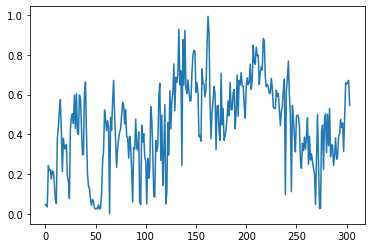

In [23]:
plt.plot(range(n_train_samples), train_data)

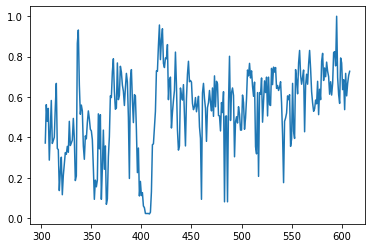

In [24]:
plt.plot(range(n_train_samples, len(data)), test_data)

In [25]:
# num_features = 12 batch_size = 8 时效果较好
train_dataset = MyDataset(train_data, num_features=12)
test_dataset = MyDataset(test_data, num_features=12)
train_loader = paddle.io.DataLoader(train_dataset, batch_size=8, shuffle=False, drop_last=False)
# train_dataset = MyDataset(train_data, num_features=1)
# test_dataset = MyDataset(test_data, num_features=1)
# train_loader = paddle.io.DataLoader(train_dataset, batch_size=8, shuffle=False, drop_last=False)

In [26]:
# 训练代码
model = LSTM()
loss_fn = paddle.nn.MSELoss(reduction='mean')
optimizer = paddle.optimizer.Adam(learning_rate=0.01,
                                 parameters=model.parameters())

for epoch in range(30):
    for batch, (batch_x, batch_y) in enumerate(train_loader()):
        y_pred = model(batch_x)
        
        # loss = F.mse_loss(y_pred, batch_y, reduction='mean')
        loss = loss_fn(y_pred, batch_y)
        loss.backward()
        optimizer.step()
        optimizer.clear_grad()
    print("epoch {} loss {:.4f}".format(epoch, float(loss)))

/usr/local/lib/python3.7/dist-packages/paddle/fluid/dataloader/dataloader_iter.py:89: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(slot[0], (np.ndarray, np.bool, numbers.Number)):


epoch 0 loss 0.0763
epoch 1 loss 0.0517
epoch 2 loss 0.0194
epoch 3 loss 0.0077
epoch 4 loss 0.0040
epoch 5 loss 0.0027
epoch 6 loss 0.0026
epoch 7 loss 0.0027
epoch 8 loss 0.0027
epoch 9 loss 0.0027
epoch 10 loss 0.0028
epoch 11 loss 0.0030
epoch 12 loss 0.0032
epoch 13 loss 0.0034
epoch 14 loss 0.0036
epoch 15 loss 0.0038
epoch 16 loss 0.0040
epoch 17 loss 0.0042
epoch 18 loss 0.0044
epoch 19 loss 0.0045
epoch 20 loss 0.0047
epoch 21 loss 0.0049
epoch 22 loss 0.0051
epoch 23 loss 0.0053
epoch 24 loss 0.0055
epoch 25 loss 0.0057
epoch 26 loss 0.0058
epoch 27 loss 0.0060
epoch 28 loss 0.0061
epoch 29 loss 0.0063


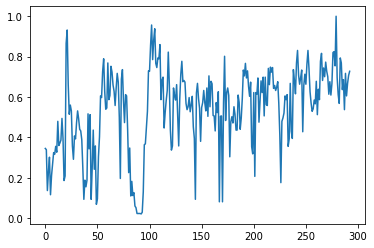

In [27]:
# test_dataset
test_x = paddle.to_tensor(test_dataset.x, dtype="float32")
y_pred = model(test_x)
# print("test_data_y",test_dataset.y)
# print("test_y_predict",y_pred)
plt.plot(test_dataset.y)
plt.show()
# print(test_dataset)
# print("predict", y_pred)

In [28]:
error_mse = []
print(len(test_data[12:]))
print(len(y_pred))
# 因为前12个记录要作为特征，这里从第十三个记录开始计算MSE损失
for i in range(len(test_data[12:])):
    error_mse.append(test_data[12+i] - y_pred[i])
squaredError = []
absError = []
for val in error_mse:
    squaredError.append(val * val)#target-prediction之差平方
print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE

293
293
MSE =  Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [0.02066652])


In [29]:
# print((test_data[12:]))
# print((y_pred[0]))

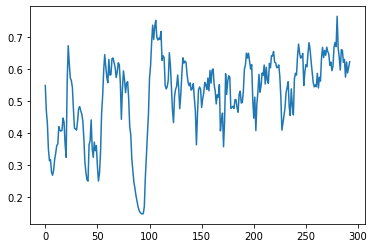

In [30]:
plt.show()
plt.plot(y_pred.numpy())

The loss value printed in the log is the current step, and the metric is the average value of previous step.
Epoch 1/10
step 24/24 [==============================] - loss: 0.0209 - 4ms/step          
Epoch 2/10
step 24/24 [==============================] - loss: 0.0445 - 3ms/step          
Epoch 3/10
step 10/24 [===========>..................] - loss: 0.0540 - ETA: 0s - 3ms/step

/usr/local/lib/python3.7/dist-packages/paddle/fluid/dataloader/dataloader_iter.py:89: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(slot[0], (np.ndarray, np.bool, numbers.Number)):
/usr/local/lib/python3.7/dist-packages/paddle/fluid/layers/utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return (isinstance(seq, collections.Sequence) and


step 24/24 [==============================] - loss: 0.0172 - 3ms/step          
Epoch 4/10
step 24/24 [==============================] - loss: 0.0213 - 3ms/step          
Epoch 5/10
step 24/24 [==============================] - loss: 0.0207 - 3ms/step          
Epoch 6/10
step 24/24 [==============================] - loss: 0.0205 - 3ms/step          
Epoch 7/10
step 24/24 [==============================] - loss: 0.0204 - 3ms/step          
Epoch 8/10
step 24/24 [==============================] - loss: 0.0197 - 3ms/step          
Epoch 9/10
step 24/24 [==============================] - loss: 0.0180 - 3ms/step          
Epoch 10/10
step 24/24 [==============================] - loss: 0.0158 - 3ms/step          
Predict begin...
step 293/293 [==============================] - 3ms/step          
Predict samples: 293


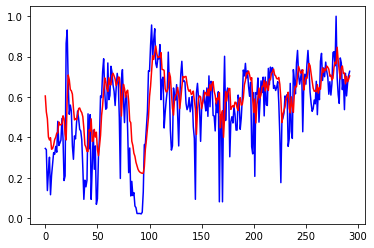

In [31]:
model = paddle.Model(LSTM())
model.prepare(optimizer=paddle.optimizer.Adam(learning_rate=0.01, parameters=model.parameters()),
              loss=paddle.nn.MSELoss(reduction='mean'))
model.fit(train_dataset,
          epochs=10,
          batch_size=12,
          shuffle=False,  # True 和 False 对结果影响很大
          drop_last=True,
          verbose=1)
y_pred = model.predict(test_dataset)
plt.plot(test_dataset.y, c='blue')
plt.plot(np.concatenate(y_pred), c='red')
plt.show()